In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
import math
import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
!gdown https://drive.google.com/uc?id=1Qc66kVqetwJIK7cKXnXxbPJy6gnpRSRI
!unzip The_Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
trainpath = './seg_train/'
testpath = './seg_test/'
predpath = './seg_pred/'

In [ ]:
s = 100

In [ ]:
code_to_num = {'buildings':0 ,'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
num_to_code = {0:'buildings' ,1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}

def get_code(n) : 
    if n in num_to_code:
        return num_to_code[n]    

def get_num(c):
    if c in code_to_num:
        return code_to_num[c] 

In [ ]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(get_num(folder))

In [ ]:
print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(get_num(folder))

In [ ]:
print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


In [ ]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))      

In [ ]:
print(f'we have {len(X_pred)} items in X_pred')

we have 7301 items in X_pred


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=32,
                                                     directory=trainpath,
                                                     shuffle=True,
                                                     target_size=(s,s),
                                                     class_mode='binary')

Found 14034 images belonging to 1 classes.


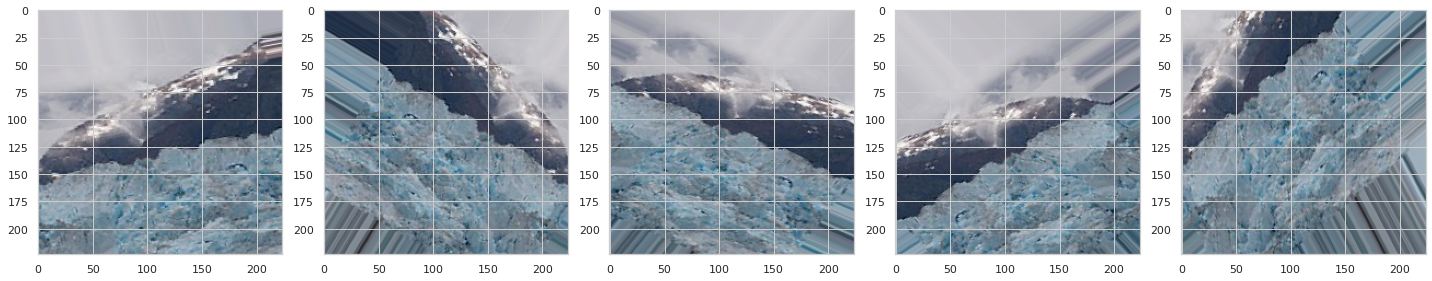

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(X_train.shape[0])

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)
14034


In [ ]:
KerasModel = keras.models.Sequential([
                                      tf.keras.layers.Conv2D(32,(3,3),activation='',input_shape=(224,224,3)),
                                      tf.keras.layers.MaxPooling2D(2,2),

                                      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),

                                      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),

                                      tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),

                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(64,activation='relu'),
                                      tf.keras.layers.Dense(6,activation='softmax')
])

In [ ]:
KerasModel.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])


In [ ]:
print('Model Details are : ')
print(KerasModel.summary())

In [ ]:
ThisModel = KerasModel.fit(X_train, y_train, batch_size=32, epochs=10, steps_per_epoch=math.ceil(X_train.shape[0]/32))

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))